In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sb

In [3]:
start_year = 1980

countries_and_codes_path = "../turners_health_analysis/data_exports/countries_and_codes_20Countries.csv"
countries_and_codes_data = pd.read_csv(countries_and_codes_path)
countries_and_codes_df = pd.DataFrame(countries_and_codes_data)
countries_and_codes_df

,country,country_code
0,Belgium,BEL
1,Canada,CAN
2,China,CHN
3,Denmark,DNK
4,Estonia,EST
5,Finland,FIN
6,France,FRA
7,Germany,DEU
8,Ireland,IRL
9,Israel,ISR


In [23]:
# File to Load (Remember to change these)
#OECD_spend_govt_compulsory_filepath = "data_sources/OECD_healthcare_spend_govt-compulsory_dollars_per_capita_1980.csv"
total_gdp_per_capita_filepath = "../turners_health_analysis/data_exports/CLEAN_gdp_20Countries.csv"

# Read in the data from the CSV
total_gdp_per_capita_data = pd.read_csv(total_gdp_per_capita_filepath)

# convert data to a DataFrame
total_gdp_per_capita_df = pd.DataFrame(total_gdp_per_capita_data)

total_gdp_per_capita_df.head()


,gdp,year,entity
0,31769.54,1980,Canada
1,32477.44,1981,Canada
2,31060.90,1982,Canada
3,31549.57,1983,Canada
4,33099.78,1984,Canada


In [15]:
# File to Load (Remember to change these)
#OECD_spend_govt_compulsory_filepath = "data_sources/OECD_healthcare_spend_govt-compulsory_dollars_per_capita_1980.csv"
percent_spend_education_filepath = "data_sources/total-government-expenditure-on-education-gdp.csv"

# Read in the data from the CSV
percent_spend_education_data = pd.read_csv(percent_spend_education_filepath)

# convert data to a DataFrame
percent_spend_education_df = pd.DataFrame(percent_spend_education_data)
# percent_spend_education_df = percent_spend_education_df_raw.rename(columns={"Entity":"entity",
#                                                                             "Code":"code",
#                                                                             "Year":"year",
#                                                                             "(% of GDP)":"percent_gdp"})

percent_spend_education_df.columns = ["entity","code","year","percent_gdp"]


percent_spend_education_df.head()


,entity,code,year,percent_gdp
0,Afghanistan,AFG,1971,1.16036
1,Afghanistan,AFG,1972,1.11718
2,Afghanistan,AFG,1973,1.42788
3,Afghanistan,AFG,1975,1.30332
4,Afghanistan,AFG,1979,1.73981


# merge percent with total GDP

In [29]:
percent_spend_education_subset_df = percent_spend_education_df.loc[(percent_spend_education_df["code"].isin(countries_and_codes_df["country_code"]))
                                                              & (percent_spend_education_df["year"] >= start_year)
                                                              ,["entity","year","percent_gdp"]]

percent_spend_education_subset_df.head()

# merge two datasets together
#merge_table1 = pd.merge(percent_spend_education_subset_df, total_gdp_per_capita_df, on=["entity","year"], how="left")
merge_table = pd.merge(percent_spend_education_subset_df, total_gdp_per_capita_df, on=["entity","year"], how="left")
merge_table.head()

merge_table["education_spend"] = merge_table["percent_gdp"] * merge_table["gdp"] / 100
merge_table.head()


,entity,year,percent_gdp,gdp,education_spend
0,Belgium,1980,5.28236,27463.27,1450.708810
1,Belgium,1981,5.40638,27371.01,1479.780859
2,Belgium,1982,5.28842,27522.96,1455.529776
3,Belgium,1986,4.82646,29264.86,1412.456728
4,Belgium,1987,4.55276,29914.42,1361.931785


In [27]:
# country_year_spend = percent_spend_education_df.loc[(percent_spend_education_df["code"].isin(countries_and_codes_df["country_code"]))
#                                                               & (OECD_spend_govt_compulsory_df["year"] >= start_year)
#                                                               ,["code","year","spend"]]


# Check to see that all the countries are in this list
countries_and_codes_df["country"].isin(merge_table["entity"].unique())

#country_year_spend.head()








0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: country, dtype: bool

<IPython.core.display.Javascript object>


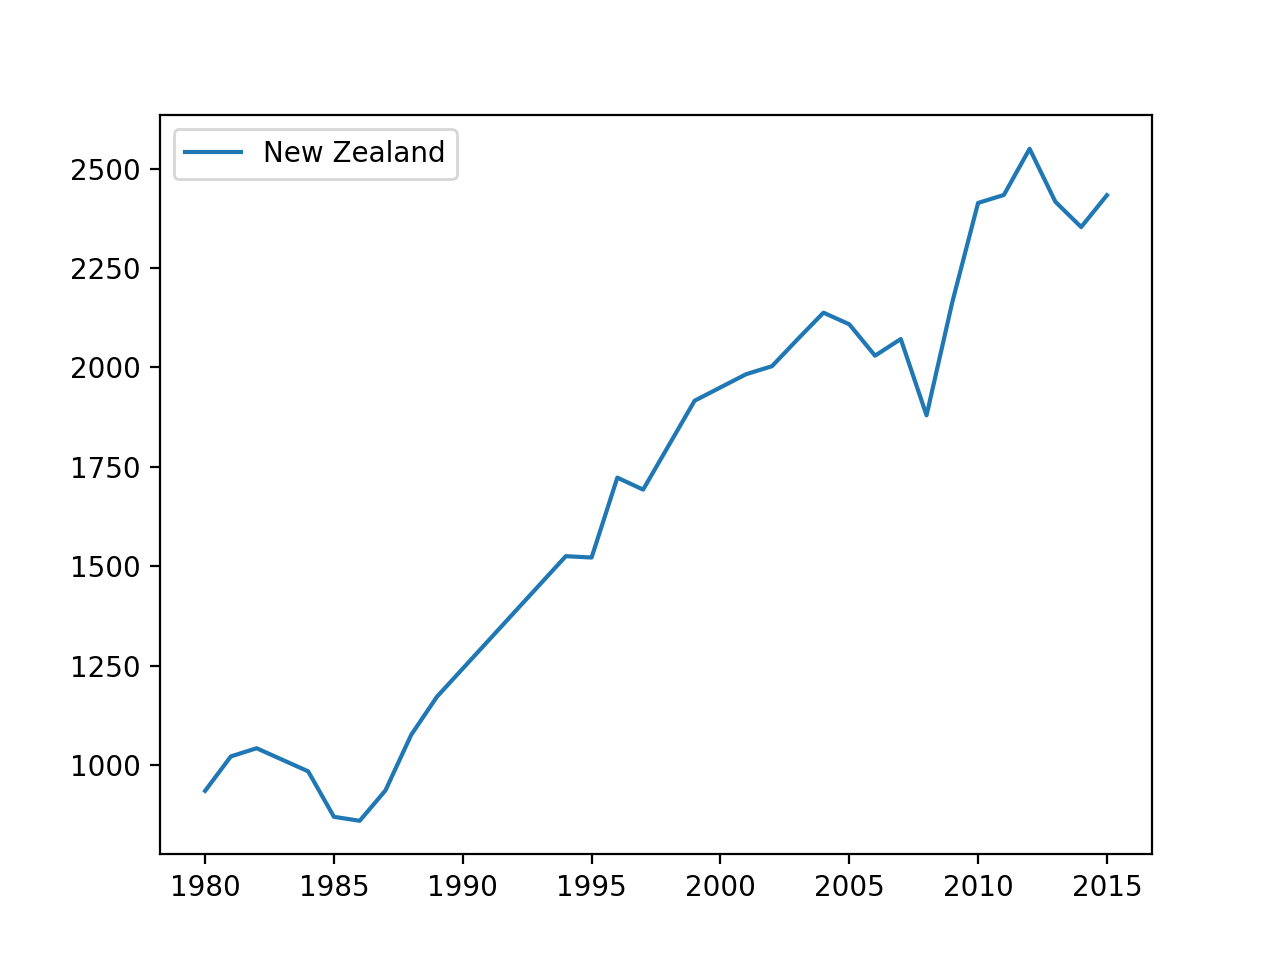

In [32]:
fig1, ax2 = plt.subplots()
country = "New Zealand"

#for country in merge_table["entity"].unique():
#     year = merge_table.loc[merge_table["entity"] == country,["year"]]
#     spend = merge_table.loc[merge_table["entity"] == country,["education_spend"]]
#     ax2.plot(year, spend["education_spend"], label=country)

year = merge_table.loc[merge_table["entity"] == country,["year"]]
spend = merge_table.loc[merge_table["entity"] == country,["education_spend"]]
ax2.plot(year, spend["education_spend"], label=country)


#ax2.plot(x_axis_from_year_specified, world_subset_life_expectancy["Life expectancy"], label="World", linestyle='dashed', linewidth=2)

ax2.legend(loc="best")

#fig1.savefig("./Images/OECD_healthcare_spend_total.png")




In [36]:
# Save path to store output file set in a variable
#csv_output = "data_exports/CLEAN_healthcare_spending_20Countries.csv"
csv_output = "data_exports/CLEAN_education_spending_per_capita_20Countries.csv"

# Export file as a CSV, without the Pandas index, 
# but with the header
merge_table.to_csv(csv_output, index=False, header=True)

In [35]:
merge_table.loc[merge_table["entity"] == "United States",["year"]].head()

,year
506,2010
507,2011
508,2012
509,2013
510,2014
